# **Подключение необходимых библиотек и загрузка данных.**

In [1]:
!pip install catboost lightgbm xgboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostRegressor, Pool

import lightgbm as lgb
from lightgbm import Dataset, LGBMRegressor

import xgboost as xgb
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/quickstart_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/quickstart_test.csv')

In [5]:
RANDOM_STATE = 25

In [7]:
results = [] # Здесь будем хранить информацию по каждой модели

# **EDA (Exploratory Data Analysis)**

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   car_id                    2337 non-null   object 
 1   model                     2337 non-null   object 
 2   car_type                  2337 non-null   object 
 3   fuel_type                 2337 non-null   object 
 4   car_rating                2337 non-null   float64
 5   year_to_start             2337 non-null   int64  
 6   riders                    2337 non-null   int64  
 7   year_to_work              2337 non-null   int64  
 8   target_reg                2337 non-null   float64
 9   target_class              2337 non-null   object 
 10  mean_rating               2337 non-null   float64
 11  distance_sum              2337 non-null   float64
 12  rating_min                2337 non-null   float64
 13  speed_max                 2337 non-null   float64
 14  user_rid

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
car_rating,2337.0,4.354292e+00,9.969540e-01,9.800000e-01,3.740000e+00,4.360000e+00,5.000000e+00,8.900000e+00
year_to_start,2337.0,2.014041e+03,1.685852e+00,2.011000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.017000e+03
riders,2337.0,6.371144e+04,3.375501e+04,2.300000e+01,4.105300e+04,6.441500e+04,8.651500e+04,1.428620e+05
year_to_work,2337.0,2.018070e+03,2.159484e+00,2.014000e+03,2.016000e+03,2.018000e+03,2.020000e+03,2.022000e+03
target_reg,2337.0,4.494738e+01,1.764753e+01,1.764000e+01,3.157000e+01,4.001000e+01,5.472000e+01,1.411300e+02
mean_rating,2337.0,4.478831e+00,4.185875e-01,3.529885e+00,4.155747e+00,4.442989e+00,4.675345e+00,5.700747e+00
distance_sum,2337.0,1.356912e+07,4.253209e+06,1.478866e+06,1.058758e+07,1.321852e+07,1.631788e+07,3.119785e+07
rating_min,2337.0,1.388703e-01,1.639783e-01,0.000000e+00,1.000000e-01,1.000000e-01,1.000000e-01,1.500000e+00
speed_max,2337.0,1.609849e+02,3.321116e+01,9.142351e+01,1.236092e+02,1.724357e+02,1.885974e+02,2.099828e+02
user_ride_quality_median,2337.0,-3.293389e-01,9.581800e+00,-3.811634e+01,-6.141569e+00,-1.958600e-01,5.370422e+00,3.577049e+01


In [14]:
train.isnull().sum()

car_id                      0
model                       0
car_type                    0
fuel_type                   0
car_rating                  0
year_to_start               0
riders                      0
year_to_work                0
target_reg                  0
target_class                0
mean_rating                 0
distance_sum                0
rating_min                  0
speed_max                   0
user_ride_quality_median    0
deviation_normal_count      0
user_uniq                   0
dtype: int64

In [16]:
test.isnull().sum()

car_id                      0
model                       0
car_type                    0
fuel_type                   0
car_rating                  0
year_to_start               0
riders                      0
year_to_work                0
target_class                0
mean_rating                 0
distance_sum                0
rating_min                  0
speed_max                   0
user_ride_quality_median    0
deviation_normal_count      0
user_uniq                   0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

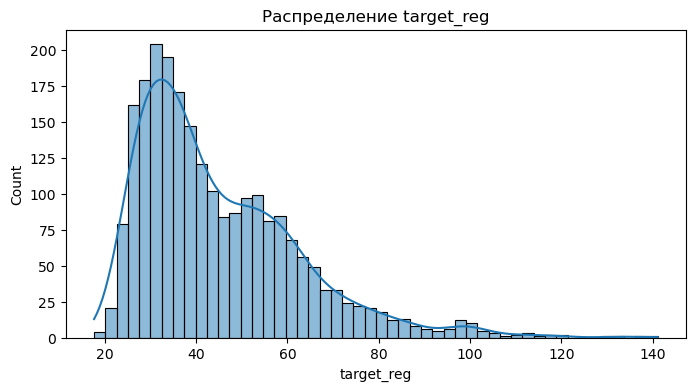

In [22]:
# Распределение целевой переменной 'target_reg'
plt.figure(figsize=(8,4))
sns.histplot(train['target_reg'], bins=50, kde=True)
plt.title('Распределение target_reg');

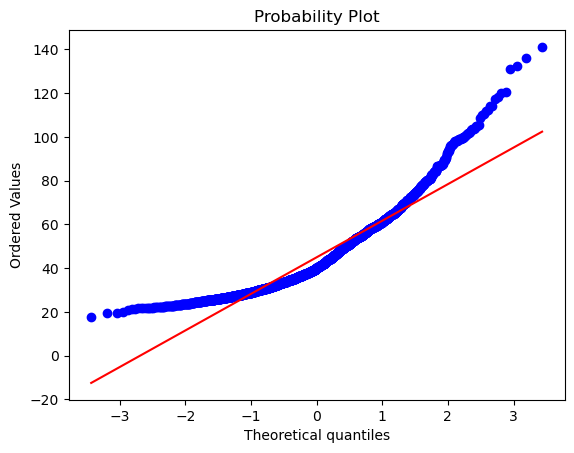

In [39]:
import pylab 
import scipy.stats as stats
  
stats.probplot(train['target_reg'], dist="norm", plot=pylab)
pylab.show()

Целевая переменная сильно смещена влево, попробуем применить логарифмирование

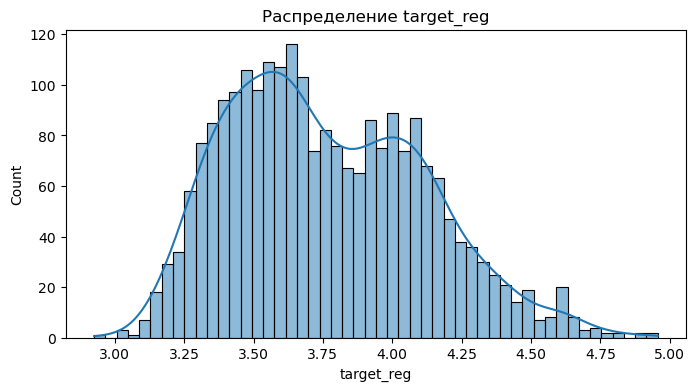

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(train['target_reg']), bins=50, kde=True)
plt.title('Распределение target_reg');

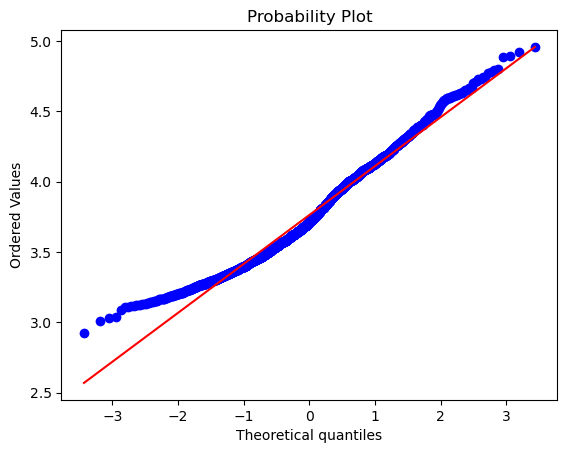

In [37]:
stats.probplot(np.log1p(train['target_reg']), dist="norm", plot=pylab)
pylab.show()

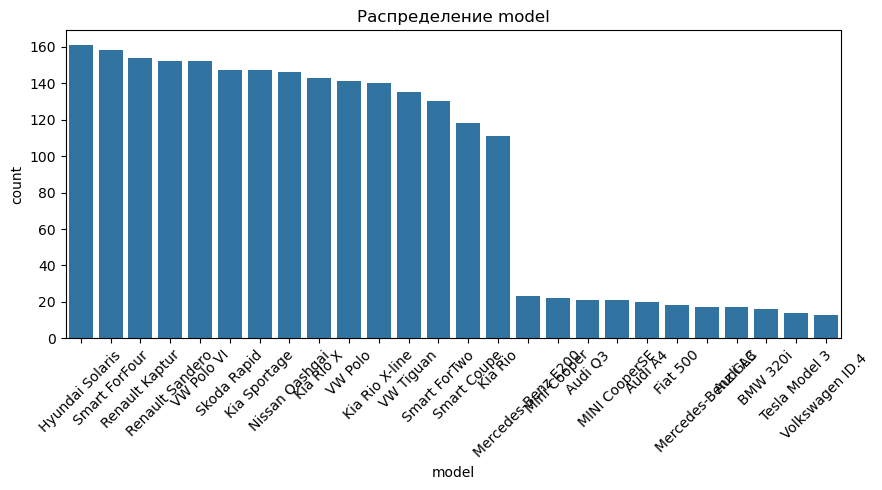

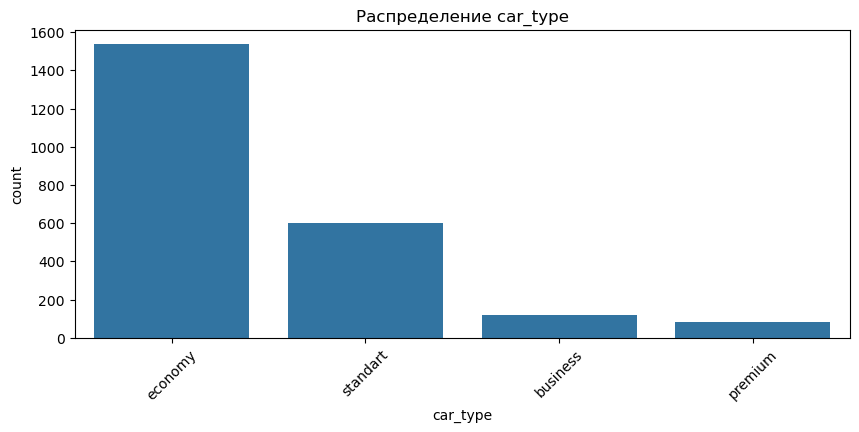

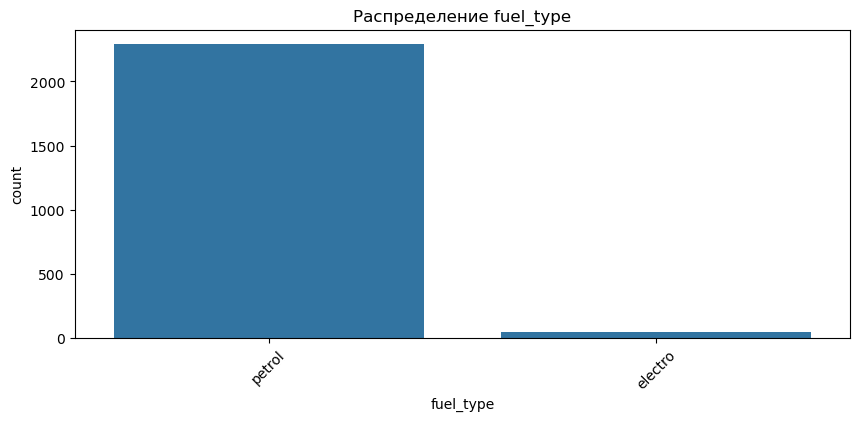

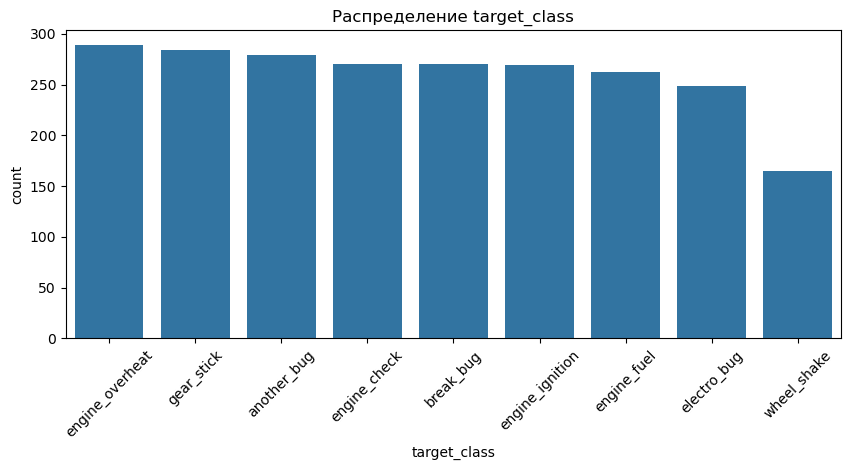

In [35]:
# Распределение по категориям в categorical колонках
categorical_cols = ['model', 'car_type', 'fuel_type','target_class']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Распределение {col}')
    plt.xticks(rotation=45)

Text(0.5, 1.0, 'Корреляция числовых признаков с target_reg')

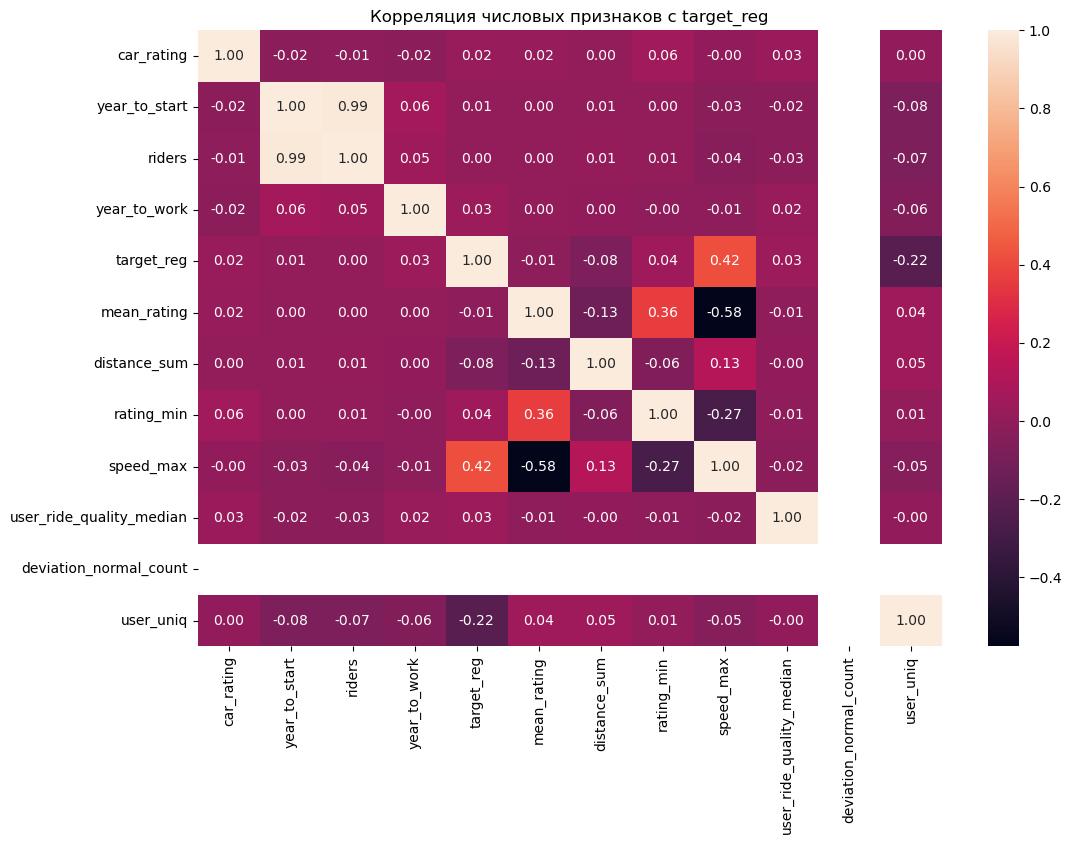

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title('Корреляция числовых признаков с target_reg')

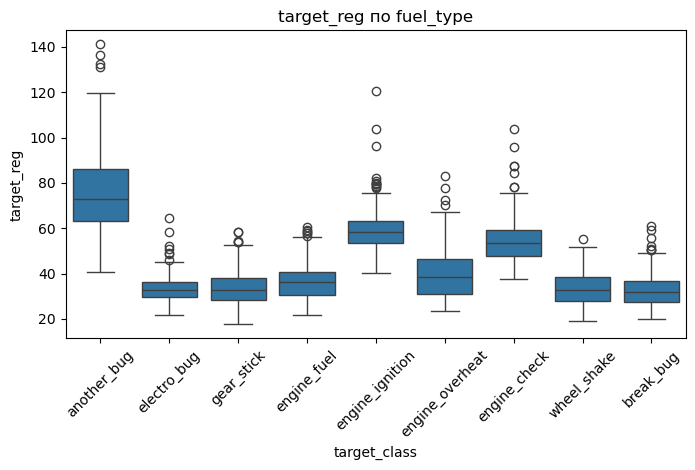

In [55]:
# Анализ зависимости target_reg от категорий, например, fuel_type
plt.figure(figsize=(8,4))
sns.boxplot(x='target_class', y='target_reg', data=train)
plt.title('target_reg по fuel_type')
plt.xticks(rotation=45);

Видим что разные классы имеют разные медианные значения и разбросы целевой переменной. Это говорит о том, что класс машины существенно влияет на прогнозируемое значение. Скорее всего при обучений модели мы уберем этот признак

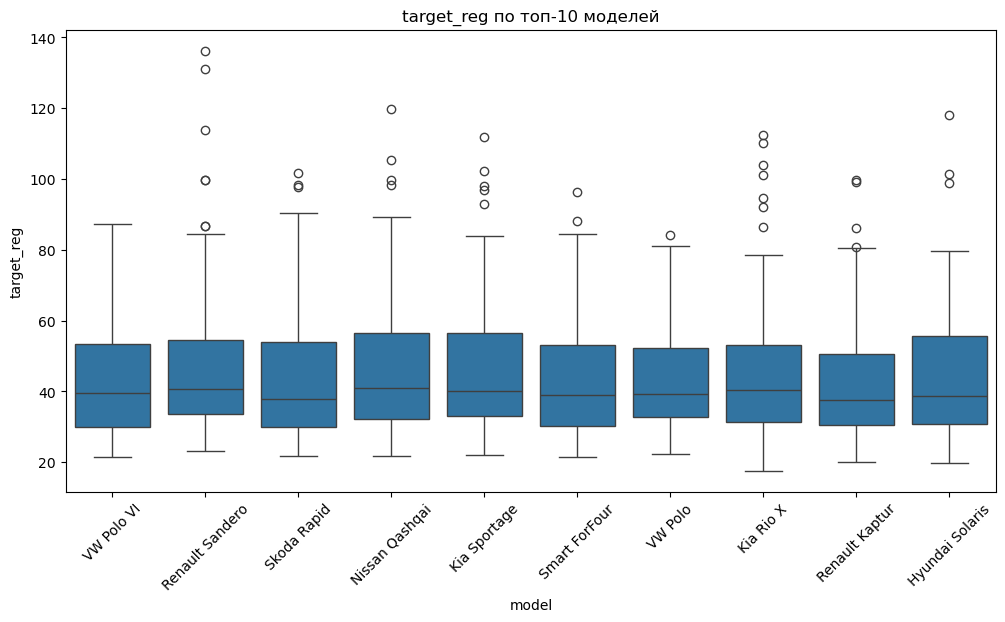

In [53]:
# Анализ зависимости target_reg от модели автомобиля
plt.figure(figsize=(12,6))
top_models = train['model'].value_counts().nlargest(10).index
sns.boxplot(x='model', y='target_reg', data=train[train['model'].isin(top_models)])
plt.title('target_reg по топ-10 моделей')
plt.xticks(rotation=45);

Некоторые модели имеют стабильные показатели, другие широкий разброс. Это логично разные модели могут различаться по стоимости, характеристикам и другим факторам, влияющим на целевую переменную.

#  **Определим вспомогательные функции.**

In [41]:
def train_model(algorithm,
                X,
                y,
                early_stopping_rounds,
                init_params=None,
                cat_features=None,
                random_seed=25):

    scores = []
    models = []
    kf = KFold(n_splits=3, shuffle=True, random_state=random_seed)

    print(f"========= TRAINING {algorithm.__name__} =========")

    for num_fold, (train_index, val_index) in enumerate(kf.split(X)):
        X_train, X_eval = X.iloc[train_index], X.iloc[val_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[val_index]

        if init_params:
            model = algorithm(**init_params)
        else:
            model = algorithm()

        if algorithm.__name__ == 'CatBoostRegressor':
            train_dataset = Pool(X_train, y_train, cat_features=cat_features)
            eval_dataset = Pool(X_eval, y_eval, cat_features=cat_features)
            model.fit(train_dataset,
                      eval_set=eval_dataset,
                      verbose=0,
                      early_stopping_rounds=early_stopping_rounds)
            y_pred = model.predict(X_eval)

        elif algorithm.__name__ == 'LGBMRegressor':
            train_dataset = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
            eval_dataset = lgb.Dataset(X_eval, y_eval, reference=train_dataset, categorical_feature=cat_features)
            model = lgb.train(params=init_params,
                              train_set=train_dataset,
                              valid_sets=[eval_dataset],
                              callbacks=[lgb.early_stopping(early_stopping_rounds),lgb.log_evaluation(0)])
            y_pred = model.predict(X_eval)

        elif algorithm.__name__ == 'XGBRegressor':
            train_dataset = xgb.DMatrix(X_train, label=y_train,enable_categorical=True)
            eval_dataset = xgb.DMatrix(X_eval, label=y_eval,enable_categorical=True)
            model = xgb.train(params=init_params,
                              dtrain=train_dataset,
                              evals=[(eval_dataset, 'eval')],
                              verbose_eval=False,
                              early_stopping_rounds=early_stopping_rounds)
            y_pred = model.predict(eval_dataset)

        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_eval)

        # RMSE
        score = np.sqrt(mean_squared_error(y_eval, y_pred))
        scores.append(score)
        models.append(model)
        print(f'FOLD {num_fold}: SCORE {score:.4f}')

    mean_kfold_score = np.mean(scores, dtype="float16") - np.std(scores, dtype="float16")
    print(f"\nMEAN RMSE SCORE (with std penalty): {mean_kfold_score:.4f}")

    best_idx = np.argmin(scores)
    best_model = models[best_idx]

    return mean_kfold_score, best_model

In [2]:
def tuning_hyperparams(algorithm,
                       X,
                       y,
                       init_params,
                       fit_params,
                       grid_params,
                       n_iter,
                       cv=3,
                       random_state=2023,
    ):

    estimator = algorithm(**init_params)

    # Можно использоавть GridSearchCV
    model = RandomizedSearchCV(estimator=estimator,
                               param_distributions=grid_params,
                               n_iter=n_iter,
                               cv=cv,
                               scoring='neg_root_mean_squared_error',
                               n_jobs=-1,
                               verbose=0,
                               random_state=random_state
    )

    model.fit(X, y, **fit_params)

    return model.best_params_ | init_params

# **Группируем признаки, отбираем категориальные, выделяем датасет для обучения.**

In [43]:
train.head(2)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.737759,1.214131e+07,0.1,180.855726,0.023174,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.480517,1.803909e+07,0.0,187.862734,12.306011,174,174


In [45]:
train.columns

Index(['car_id', 'model', 'car_type', 'fuel_type', 'car_rating',
       'year_to_start', 'riders', 'year_to_work', 'target_reg', 'target_class',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq'],
      dtype='object')

In [47]:
train.select_dtypes(['int','float']).columns

Index(['car_rating', 'year_to_start', 'riders', 'year_to_work', 'target_reg',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq'],
      dtype='object')

In [49]:
train.select_dtypes('object').columns

Index(['car_id', 'model', 'car_type', 'fuel_type', 'target_class'], dtype='object')

In [51]:
cat_features = ['model', 'car_type', 'fuel_type', ]
targets = 'target_reg'
features2drop = ['car_id','target_class']

filtered_features = ['model', 'car_type', 'fuel_type', 'car_rating',
       'year_to_start', 'riders', 'year_to_work', 'target_reg',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']

num_features = ['car_rating', 'year_to_start', 'riders', 'year_to_work','mean_rating', 'distance_sum', 'rating_min', 'speed_max',
                  'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']


print("cat_features", cat_features)
print("num_features", num_features)
print("targets", targets)

cat_features ['model', 'car_type', 'fuel_type']
num_features ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
targets target_reg


In [59]:
X = train[filtered_features].drop(targets, axis=1, errors="ignore")
y = train["target_reg"]

# **CatBoostRegressor.**



## **Обучение модели.**

In [61]:
cb_init_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'thread_count': -1,
    'task_type': 'CPU',
    'random_seed': RANDOM_STATE
}

cb_score, cb_model = train_model(
    algorithm=CatBoostRegressor,
    X=X, y=y,
    init_params=cb_init_params,
    early_stopping_rounds=100,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING CatBoostRegressor =========
FOLD 0: SCORE 11.2848
FOLD 1: SCORE 11.5493
FOLD 2: SCORE 12.1355

MEAN RMSE SCORE (with std penalty): 11.2969


Сделаем предсказание для тестовой части и проверим скор на лидерборде

In [16]:
cb_score

np.float16(11.3)

In [57]:
cb_test_pred = cb_model.predict(test.drop(features2drop, axis=1))
pd.DataFrame({'car_id': test['car_id'], 'target_reg': cb_test_pred}).to_csv('cb_pred.csv', index=False)

In [90]:
results.append({
    'model_name': 'CatBoostRegressor',
    'tuning': False,
    'mean_kfold_score': cb_score,
    'leaderboard_score': 11.9,
    'model': cb_model
})

## **Подбор гиперпараметров и обучение модели с новыми параметрами.**

In [18]:
cb_fit_params = {
    'cat_features': cat_features,
    'verbose': 0,
    'early_stopping_rounds': 100
}


cb_grid_params = {
    'depth': [6, 8, 10],               # Глубина деревьев
    'learning_rate': [0.01, 0.03, 0.1], # Скорость обучения
    'iterations': [500, 800, 1000],     # Количество деревьев
    'bootstrap_type': ['Bayesian'],     # тип бустрэппинга
    'l2_leaf_reg': [1, 3, 5],           # Коэффициент L2-регуляризации
    'random_strength': [0.5, 1, 2],     # Влияние случайности при выборе разбиений
    'border_count': [32, 64, 128],      # Количество разбиений для числовых признаков
    'bagging_temperature': [0, 0.5, 1], # Интенсивность байесовского бэггинга
    'grow_policy': ['SymmetricTree', 'Depthwise'], # Стратегия роста деревьев
    'loss_function': ['RMSE']
}


catboost_params_after_tuning = tuning_hyperparams(algorithm=CatBoostRegressor,
                                                  X=X, y=y,
                                                  init_params=cb_init_params,
                                                  fit_params=cb_fit_params,
                                                  grid_params=cb_grid_params,
                                                  n_iter=20,
                                                  cv=3,
                                                  random_state=RANDOM_STATE
)

catboost_params_after_tuning

{'random_strength': 0.5,
 'loss_function': 'RMSE',
 'learning_rate': 0.01,
 'l2_leaf_reg': 3,
 'iterations': 500,
 'grow_policy': 'SymmetricTree',
 'depth': 6,
 'border_count': 128,
 'bootstrap_type': 'Bayesian',
 'bagging_temperature': 0,
 'eval_metric': 'RMSE',
 'thread_count': -1,
 'task_type': 'CPU',
 'random_seed': 25}

In [19]:
cb_tuning_score, cb_tuning_model = train_model(algorithm=CatBoostRegressor,
                                               X=X, y=y,
                                               early_stopping_rounds=100,
                                               init_params=catboost_params_after_tuning,
                                               cat_features=cat_features,
                                               random_seed=RANDOM_STATE)

========= TRAINING CatBoostRegressor =========
FOLD 0: SCORE 11.3082
FOLD 1: SCORE 11.5881
FOLD 2: SCORE 12.2141

MEAN RMSE SCORE (with std penalty): 11.3203


In [20]:
tuning_cb_test_pred = cb_tuning_model.predict(test.drop(features2drop, axis=1))

pd.DataFrame({'car_id': test['car_id'], 'target_reg': tuning_cb_test_pred}).to_csv('tuning_cb_pred.csv', index=False)

In [91]:
results.append({
    'model_name': 'CatBoostRegressor',
    'tuning': True,
    'mean_kfold_score': cb_tuning_score,
    'leaderboard_score': 11.8,
    'model': cb_tuning_model
})

# **LightGBMRegressor (goss).**

## **Подготовка категориальных признаков.**

In [37]:
encoders = {}
X_lgb = X.copy()

for col in X_lgb.columns:
    if X_lgb[col].dtype == 'object' or X_lgb[col].dtype.name == 'category':
        le = LabelEncoder()
        X_lgb[col] = le.fit_transform(X_lgb[col].astype(str))
        encoders[col] = le  # Сохраняем encoder для этой колонки

## **Обучение модели.**

In [38]:
lgb_init_params = {
    'boosting_type': 'goss',
    'n_jobs': -1,
    'metric': 'rmse',
    'objective': 'regression',
    'random_state': RANDOM_STATE,
    'verbosity': -1,
    'device': 'cpu',
}


lgb_score, lgb_model = train_model(
    algorithm=LGBMRegressor,
    X=X_lgb, y=y,
    init_params=lgb_init_params,
    early_stopping_rounds=50,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING LGBMRegressor =========
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's rmse: 11.9544
FOLD 0: SCORE 11.9544
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 12.0805
FOLD 1: SCORE 12.0805
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's rmse: 12.3828
FOLD 2: SCORE 12.3828

MEAN RMSE SCORE (with std penalty): 11.9531


In [39]:
test_lgb = test.drop(features2drop, axis=1).copy()

for col in test_lgb.columns:
    if col in encoders:
        le = encoders[col]
        test_lgb[col] = le.transform(test_lgb[col].astype(str))

In [41]:
lgb_test_pred = lgb_model.predict(test_lgb)

pd.DataFrame({'car_id': test['car_id'], 'target_reg': lgb_test_pred}).to_csv('lgb_pred.csv', index=False)

In [92]:
results.append({
    'model_name': 'LGBMRegressor (goss)',
    'tuning': False,
    'mean_kfold_score': lgb_score,
    'leaderboard_score': 12.6,
    'model': lgb_model
})

## **Подбор гиперпараметров и обучение модели с новыми параметрами**

In [43]:
lgb_fit_params = {
    'eval_metric': 'rmse',
    'categorical_feature': cat_features
}


lgb_grid_params = {
    'max_depth': [6, 8, 10],                      # Максимальная глубина дерева
    'min_data_in_leaf': [20, 50, 100],            # Минимальное количество данных в листе
    'num_leaves': [31, 64, 128],                  # Количество листьев (размер дерева)
    'learning_rate': [0.01, 0.05, 0.1],           # Скорость обучения
    'feature_fraction': [0.7, 0.9, 1.0],          # Доля признаков, используемых при построении одного дерева
    'bagging_fraction': [0.7, 0.9, 1.0],          # Доля выборки для каждого дерева
    'bagging_freq': [0, 1, 5],                    # Частота бэггинга
    'lambda_l1': [0, 0.1, 1],                     # L1-регуляризация
    'lambda_l2': [0, 0.1, 1],                     # L2-регуляризация
    'boosting_type': ['gbdt'],                   # Тип бустинга
    'objective': ['regression'],
    'metric': ['rmse']
}



lgb_params_after_tuning = tuning_hyperparams(algorithm=LGBMRegressor,
                                             X=X_lgb, y=y,
                                             init_params=lgb_init_params,
                                             fit_params=lgb_fit_params,
                                             grid_params=lgb_grid_params,
                                             n_iter=20,
                                             cv=3,
                                             random_state=RANDOM_STATE
)

lgb_params_after_tuning

{'objective': 'regression',
 'num_leaves': 128,
 'min_data_in_leaf': 100,
 'metric': 'rmse',
 'max_depth': 6,
 'learning_rate': 0.1,
 'lambda_l2': 1,
 'lambda_l1': 0,
 'feature_fraction': 0.7,
 'boosting_type': 'goss',
 'bagging_freq': 0,
 'bagging_fraction': 0.9,
 'n_jobs': -1,
 'random_state': 25,
 'verbosity': -1,
 'device': 'cpu'}

In [44]:
lgb_tuning_score, lgb_tuning_model = train_model(
    algorithm=LGBMRegressor,
    X=X_lgb, y=y,
    init_params=lgb_params_after_tuning,
    early_stopping_rounds=50,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING LGBMRegressor =========
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[90]	valid_0's rmse: 12.06
FOLD 0: SCORE 12.0600
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's rmse: 12.419
FOLD 1: SCORE 12.4190
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[90]	valid_0's rmse: 12.9607
FOLD 2: SCORE 12.9607

MEAN RMSE SCORE (with std penalty): 12.1094


Сделаем предсказание для тестовой части и проверим скор на [лидерборде](https://stepik.org/lesson/779920/step/5?unit=782494)

In [45]:
lgb_tun_test_pred = lgb_tuning_model.predict(test_lgb)

pd.DataFrame({'car_id': test['car_id'], 'target_reg': lgb_test_pred}).to_csv('lgb_tun_pred.csv', index=False)

In [93]:
results.append({
    'model_name': 'LGBMRegressor (goss)',
    'tuning': True,
    'mean_kfold_score': lgb_tuning_score,
    'leaderboard_score': 12.6,
    'model': lgb_tuning_model
})

# **XGBoostRegressor (dart).**

## **Подготовка категориальных признаков.**

In [51]:
X_xgb = X.copy()

for col in X_xgb.columns:
    if X_xgb[col].dtype == 'object':
        X_xgb[col] = X_xgb[col].astype('category')

## **Обучение модели.**

In [55]:
xgb_init_params = {
    'enable_categorical': True,
    'booster': 'dart',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'random_state': RANDOM_STATE,
    'n_jobs': -1,
    'verbosity': 0,
    'sample_type': 'uniform',
    'normalize_type': 'tree'
}


xgb_score, xgb_model = train_model(
    algorithm=XGBRegressor,
    X=X_xgb, y=y,
    init_params=xgb_init_params,
    early_stopping_rounds=50,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING XGBRegressor =========
FOLD 0: SCORE 11.9388
FOLD 1: SCORE 12.3936
FOLD 2: SCORE 12.9459

MEAN RMSE SCORE (with std penalty): 12.0156


Сделаем предсказание для тестовой части и проверим скор на [лидерборде](https://stepik.org/lesson/779920/step/5?unit=782494)

In [56]:
test_xgb = test.drop(features2drop, axis=1).copy()

for col in test_xgb.columns:
    if test_xgb[col].dtype == 'object':
        test_xgb[col] = test_xgb[col].astype('category')

In [58]:
dtest = xgb.DMatrix(test_xgb, enable_categorical=True)
xgb_test_pred = xgb_model.predict(dtest)

pd.DataFrame({'car_id': test['car_id'], 'target_reg': xgb_test_pred}).to_csv('xgb_pred.csv', index=False)

In [94]:
results.append({
    'model_name': 'XGBRegressor (dart)',
    'tuning': False,
    'mean_kfold_score': xgb_score,
    'leaderboard_score': 12.3,
    'model': xgb_model
})

## **Подбор гиперпараметров и обучение модели с новыми параметрами**

In [60]:
xgb_grid_params = {
    'max_depth': [4, 6, 8],              # Максимальная глубина дерева
    'max_leaves': [16, 32, 64],          # Максимальное количество листьев
    'learning_rate': [0.01, 0.05, 0.1],  # Скорость обучения
    'subsample': [0.7, 0.9, 1.0],        # Подвыборка объектов
    'colsample_bytree': [0.7, 0.9, 1.0], # Подвыборка признаков
    'lambda': [0, 1, 3],                 # L2-регуляризация
    'alpha': [0, 1, 3],                  # L1-регуляризация
    'n_estimators': [300, 500, 800],     # Число деревьев (если используешь XGBRegressor)
    'booster': ['gbtree', 'dart'],       # Тип бустинга
    'rate_drop': [0.0, 0.1, 0.3],        # Только для DART: вероятность отброса дерева
    'skip_drop': [0.0, 0.1, 0.3],        # Только для DART: вероятность пропуска дерева
}

xgb_fit_params = {
    'verbose': False
}


xgb_params_after_tuning = tuning_hyperparams(algorithm=XGBRegressor,
                                             X=X_xgb, y=y,
                                             init_params=xgb_init_params,
                                             fit_params=xgb_fit_params,
                                             grid_params=xgb_grid_params,
                                             n_iter=20,
                                             cv=3,
                                             random_state=RANDOM_STATE
)

xgb_params_after_tuning

{'subsample': 0.7,
 'skip_drop': 0.1,
 'rate_drop': 0.0,
 'n_estimators': 800,
 'max_leaves': 16,
 'max_depth': 4,
 'learning_rate': 0.01,
 'lambda': 0,
 'colsample_bytree': 0.9,
 'booster': 'dart',
 'alpha': 0,
 'enable_categorical': True,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'random_state': 25,
 'n_jobs': -1,
 'verbosity': 0,
 'sample_type': 'uniform',
 'normalize_type': 'tree'}

In [62]:
xgb_tuning_score, xgb_tuning_model = train_model(
    algorithm=XGBRegressor,
    X=X_xgb, y=y,
    init_params=xgb_params_after_tuning,
    early_stopping_rounds=50,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING XGBRegressor =========
FOLD 0: SCORE 16.0501
FOLD 1: SCORE 16.6040
FOLD 2: SCORE 18.1150

MEAN RMSE SCORE (with std penalty): 16.0469


In [63]:
tuning_xgb_test_pred = xgb_tuning_model.predict(dtest)

pd.DataFrame({'car_id': test['car_id'], 'target_reg': tuning_xgb_test_pred}).to_csv('tuning_xgb_pred.csv', index=False)

In [95]:
results.append({
    'model_name': 'XGBRegressor (dart)',
    'tuning': True,
    'mean_kfold_score': xgb_tuning_score,
    'leaderboard_score': 16.7,
    'model': xgb_tuning_model
})

# **Финальное предсказание и сохранение лучших моделей**

In [65]:
results

[{'model_name': 'CatBoostRegressor',
  'tuning': False,
  'kfold_score': np.float16(11.3),
  'leaderboard_score': 11.9,
  'model': <catboost.core.CatBoostRegressor at 0x7ed30395fb10>},
 {'model_name': 'CatBoostRegressor',
  'tuning': True,
  'mean_kfold_score': np.float16(11.32),
  'leaderboard_score': 11.8,
  'model': <catboost.core.CatBoostRegressor at 0x7ed302dd3010>},
 {'model_name': 'LGBMRegressor (goss)',
  'tuning': False,
  'mean_kfold_score': np.float16(11.95),
  'leaderboard_score': 12.6,
  'model': <lightgbm.basic.Booster at 0x7ed2fc8e5d50>},
 {'model_name': 'LGBMRegressor (goss)',
  'tuning': True,
  'mean_kfold_score': np.float16(12.11),
  'leaderboard_score': 12.6,
  'model': <lightgbm.basic.Booster at 0x7ed2fc911d90>},
 {'model_name': 'XGBRegressor (dart)',
  'tuning': False,
  'mean_kfold_score': np.float16(12.016),
  'leaderboard_score': 12.3,
  'model': <xgboost.core.Booster at 0x7ed2fb901590>},
 {'model_name': 'XGBRegressor (dart)',
  'tuning': True,
  'mean_kfold_sc

In [66]:
from collections import defaultdict

best_models = {}

# Сгруппируем результаты по model_name
grouped = defaultdict(list)
for res in results:
    grouped[res['model_name']].append(res)

# Для каждой модели выберем лучшую по минимальному kfold/mean_kfold_score
for model_name, group in grouped.items():
    scores = []
    for r in group:
        if 'mean_kfold_score' in r:
            scores.append(r['mean_kfold_score'])


    min_idx = np.argmin(scores)
    best_models[model_name] = group[min_idx]

In [67]:
best_models['CatBoostRegressor']['model']

In [69]:
best_cb_model = best_models['CatBoostRegressor']['model']
best_cb_model.save_model('best_cb_model.cbm')

best_lgb_model = best_models['LGBMRegressor (goss)']['model']
best_lgb_model.save_model('best_lgb_model.mod')


best_xgb_model = best_models['XGBRegressor (dart)']['model']
best_xgb_model.save_model('best_xgb_model.json')

In [71]:
final_cb_pred = best_cb_model.predict(test.drop(features2drop, axis=1))
final_lgb_pred = best_lgb_model.predict(test_lgb)
final_xgb_pred = best_xgb_model.predict(dtest)

final_pred = (final_cb_pred + final_lgb_pred + final_xgb_pred) / 3

pd.DataFrame({'car_id': test['car_id'], 'target_reg': final_pred}).to_csv('final_submission.csv', index=False)

#  Анализ модели

In [74]:
import shap

SHAP Summary Plot - CatBoost


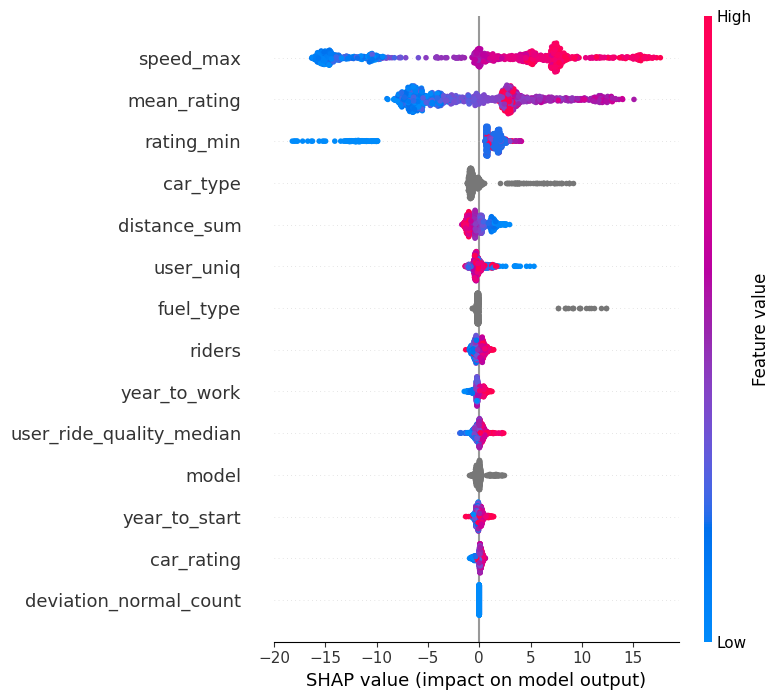

In [75]:
X_sample = X.sample(1000, random_state=RANDOM_STATE)  # используем подмножество для скорости

### SHAP для CatBoost
explainer_cb = shap.TreeExplainer(best_cb_model)
shap_values_cb = explainer_cb.shap_values(X_sample)

print("SHAP Summary Plot - CatBoost")
shap.summary_plot(shap_values_cb, X_sample)

SHAP Summary Plot - LightGBM


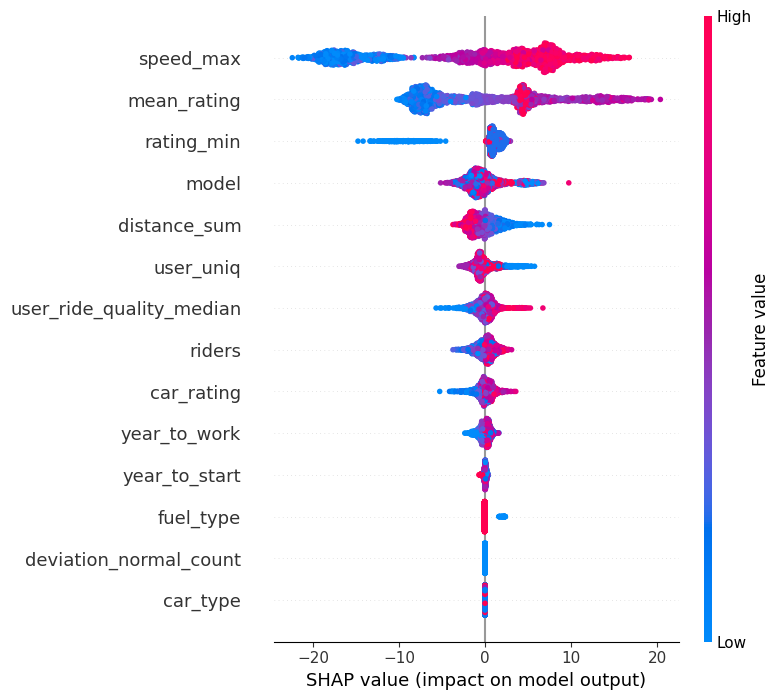

In [77]:
explainer_lgb = shap.TreeExplainer(best_lgb_model)
shap_values_lgb = explainer_lgb.shap_values(X_lgb)

print("SHAP Summary Plot - LightGBM")
shap.summary_plot(shap_values_lgb, X_lgb)

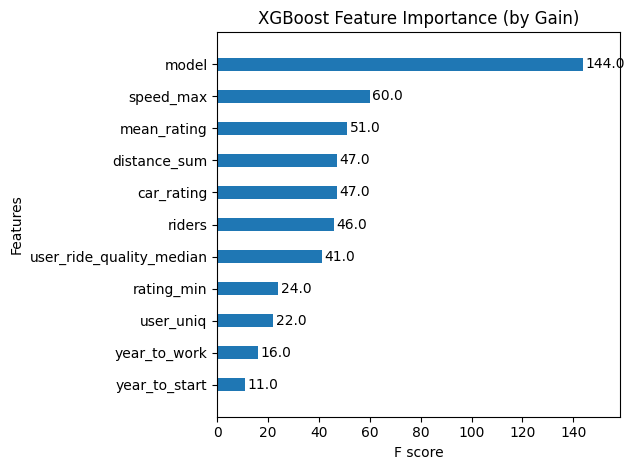

In [84]:
xgb.plot_importance(best_xgb_model,
                    importance_type='weight',
                    height=0.4,
                    grid=False)
plt.title("XGBoost Feature Importance (by Gain)")
plt.tight_layout()
plt.show()

# **Выводы.**


In [96]:
df = pd.DataFrame(results)
df

,model_name,tuning,mean_kfold_score,leaderboard_score,model
0,CatBoostRegressor,False,11.296875,11.9,<catboost.core.CatBoostRegressor object at 0x7...
1,CatBoostRegressor,True,11.320312,11.8,<catboost.core.CatBoostRegressor object at 0x7...
2,LGBMRegressor (goss),False,11.953125,12.6,<lightgbm.basic.Booster object at 0x7ed2fc8e5d50>
3,LGBMRegressor (goss),True,12.109375,12.6,<lightgbm.basic.Booster object at 0x7ed2fc911d90>
4,XGBRegressor (dart),False,12.015625,12.3,<xgboost.core.Booster object at 0x7ed2fb901590>
5,XGBRegressor (dart),True,16.046875,16.7,<xgboost.core.Booster object at 0x7ed2fc8f6210>


🏆 **Лучшая модель по качеству**

CatBoostRegressor без тюнинга показал лучший mean_kfold_score — 11.30, и неплохой leaderboard_score — 11.9.

Однако CatBoostRegressor с тюнингом показал лучший leaderboard_score — 11.8, с почти тем же качеством валидации (11.32).

**📌 Вывод:**

Тюнинг оказал положительное влияние только на CatBoost. Для LGBM и особенно XGBoost — результаты ухудшились, вероятно из-за неподходящих параметров или переобучения.


**🔁 Смешивание моделей (ансамбль)**

Усреднение предсказаний CatBoost + LGBM + XGBoost дало leaderboard_score = 12.0.

**📌 Вывод:**

Ансамблирование не улучшило результаты по сравнению с лучшей отдельной моделью (CatBoost с тюнингом, 11.8). Однако оно могло повысить устойчивость к переобучению и потенциально быть полезным в условиях шумных данных.